In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import pandas as pd

# Read the CSV file and specify that the delimiter is a comma (',')
data = pd.read_csv('u_matrix_with_time_columns.csv', delimiter=',')
meshdata = pd.read_csv('spatial_grid.csv', delimiter=',')
fdata = pd.read_csv('f_matrix.csv', delimiter=',')

grid = meshdata.values
u_matrix = data.values
u_matrix = np.insert(u_matrix, 0, 0, axis=0)
u_matrix.shape

f_matrix = fdata.values
f_matrix = np.insert(f_matrix, 0, 0, axis=0)
print("u matrix shape: ", u_matrix.shape)
print("f matrix shape: ", f_matrix.shape)
x = np.linspace(0, 2,101)
y = np.linspace(0, 2,101)
X, Y = np.meshgrid(x,y)

# reshape every row which is 10201 to 101x101
u_matrix = u_matrix.reshape(101,101,-1)

f_matrix = f_matrix.reshape(101,101,-1)


u matrix shape:  (10201, 81)
f matrix shape:  (10201, 81)


(500,)
x_train_u shape:  (500,)
y_train_u shape:  (500,)
t_train_u shape:  (500,)
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.  ]


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


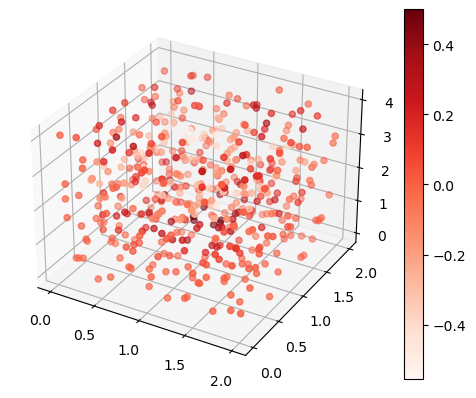

In [12]:
from matplotlib.animation import FuncAnimation
from scipy.stats import qmc
#create meshgrid for the plot

n_training_points = 500
d = 3
engine = qmc.Sobol(d, seed=77)
sample = engine.random(n_training_points)

# sample is in [0,1]^d, so we need to scale it to the range of x and t
indices = sample * np.array([len(x), len(y), len(u_matrix[0,0,:])])
t_indices = np.arange(0, len(u_matrix[0,0,:]),4)
indices = np.floor(indices).astype(int)
# sort indices so that the time cooridinates are from small to large
indices = indices[np.argsort(indices[:, 2])]

x_train_u = x[indices[:, 0]]
y_train_u = y[indices[:, 1]]
t_train_u = np.linspace(0, 4, len(u_matrix[0,0,:]))[indices[:, 2]]
u_train = u_matrix[indices[:, 0], indices[:, 1], indices[:, 2]]
print(u_train.shape)

print("x_train_u shape: ", x_train_u.shape)
print("y_train_u shape: ", y_train_u.shape)
print("t_train_u shape: ", t_train_u.shape)
#plot the ramdom points in 3d
fig = plt.figure()
ax = plt.axes(projection='3d')
im = ax.scatter3D(x_train_u, y_train_u, t_train_u,c=u_train, cmap='Reds');
plt.colorbar(im)

#np.hstack[x_train_u, y_train_u, t_train_u], np.hstack[x_train_f, y_train_f, t_train_f], np.vstack[u_train, f_train], [x, y, u_matrix, f_matrix]

print(np.linspace(0, 4, len(u_matrix[0,0,:])))


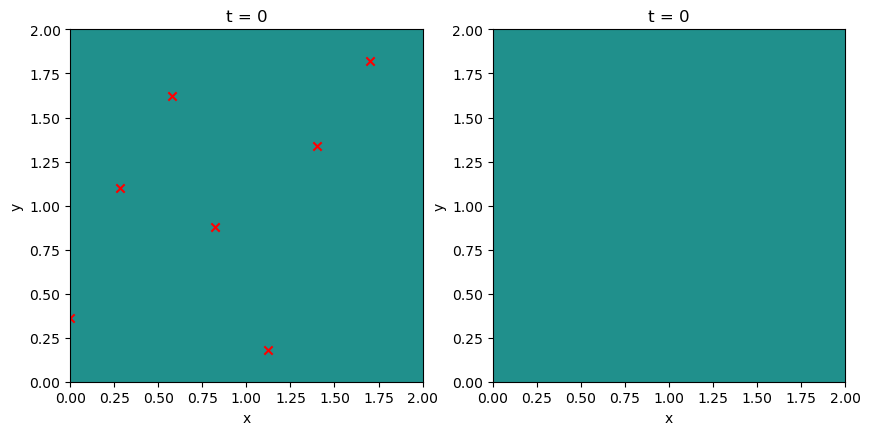

In [13]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax = ax.flatten()
def frame(t_index):
    
    ax[0].clear()
    #ax.plot_surface(X, Y, u_matrix[:,t_index].reshape(101,101), cmap='viridis')
    im = ax[0].imshow(u_matrix[:,:,t_index], cmap='viridis', extent=[0,2,0,2],vmin = -1, vmax = 1)
    
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    #ax.set_zlabel('u')
    ax[0].set_title('t = ' + str(t_index))
    #plot the training points if they exist at the time step
    ax[0].scatter(x_train_u[t_train_u==t_index], y_train_u[t_train_u==t_index], color='red', marker='x', label='training points')
    ax[1].clear()
    #ax.plot_surface(X, Y, u_matrix[:,t_index].reshape(101,101), cmap='viridis')
    ax[1].imshow(f_matrix[:,:,t_index], cmap='viridis',extent=[0,2,0,2],vmin = -10, vmax = 10)
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    #ax.set_zlabel('u')
    ax[1].set_title('t = ' + str(t_index))
    #plot the training points if they exist at the time step
    #ax[1].scatter(x_train_u, t_train_u, color='red', marker='x', label='training points')
    return fig
# Create the animation
ani = FuncAnimation(fig, frame, frames=u_matrix.shape[2], repeat=False)

ani.save('test.mp4', writer='ffmpeg', fps=15)
#plt.show()

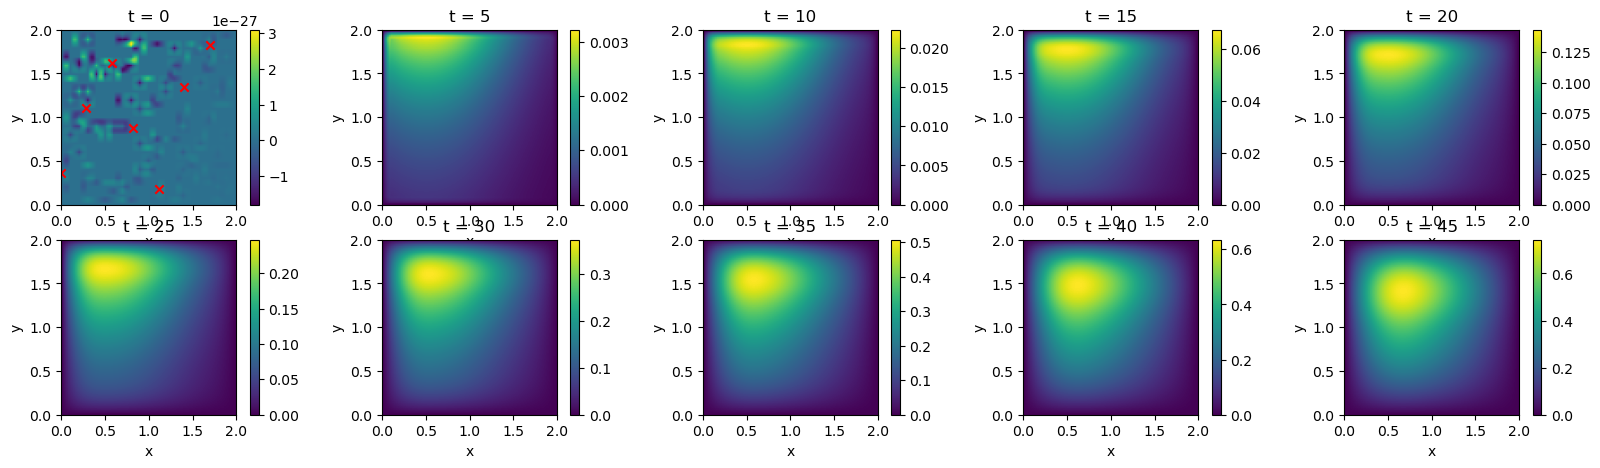

In [8]:
# plot 20 pictures in 2 rows and 10 columns
fig, ax = plt.subplots(2,5,figsize=(20,5))
ax = ax.flatten()

for i,t in zip(range(10),np.linspace(0, 4, len(u_matrix[0,0,:]))):
    
    im = ax[i].imshow(u_matrix[:,:,i*2], cmap='viridis',extent=[0,2,0,2])
    #plot the train points. we need to chekck for every t value and then plot the x,y coordinates
    ax[i].scatter(x_train_u[t_train_u==i*5], y_train_u[t_train_u==i*5], color='red', marker='x', label='training points')


    fig.colorbar(im, ax=ax[i])
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_title('t = ' + str(i*5))
    #plot the training points if they exist at the time step
    #ax[i].scatter(x_train_u, t_train_u, color='red', marker='x', label='training points')